# Finance and Economics Time-Series Analysis

## Dataset - Finance and Economics Dataset (2000 - Present) (https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
try:
    df = pd.read_csv('finance_economics_dataset.csv', parse_dates=['Date'], index_col='Date')
    print("Successfully loaded data from 'finance_economics_dataset.csv'.")
except FileNotFoundError:
    print("Error: 'finance_economics_dataset.csv' not found.")
    print("Please download the dataset from Kaggle and place it in the correct folder.")
    exit() # exit the script if the file isn't found
# project specifies a time range of 2000-2008, filtering the dataset
df = df.loc['2000-01-01':'2008-12-31']
# renaming columns for consistency and ease of use
df = df.rename(columns={
    'SP500_Index': 'SP500',
    'Inflation': 'CPI',
    'Interest_Rate': 'InterestRate',
    'Unemployment_Rate': 'UnemploymentRate'
})

Successfully loaded data from 'finance_economics_dataset.csv'.


In [3]:
# dataset exploration
print("Initial Data Exploration:")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nData types and null values:")
df.info()

Initial Data Exploration:
Shape of the dataset: (3000, 23)

First 5 rows:
           Stock Index  Open Price  Close Price  Daily High  Daily Low  \
Date                                                                     
2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

            Trading Volume  GDP Growth (%)  Inflation Rate (%)  \
Date                                                             
2000-01-01         2670411           -0.37                6.06   
2000-01-02       690220415            3.19                4.95   
2000-01-03       315284661            5.54                9.13   
2000-01-04        13098297           10.00                3.77   
2000-01-05 

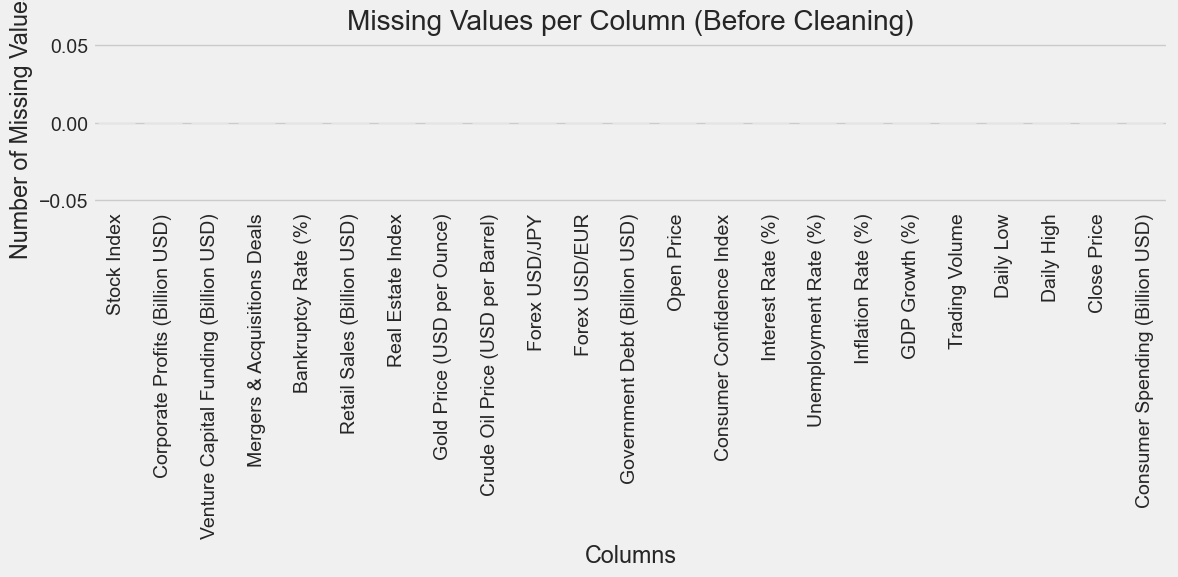

                                       Missing Values  Percentage (%)
Stock Index                                         0             0.0
Corporate Profits (Billion USD)                     0             0.0
Venture Capital Funding (Billion USD)               0             0.0
Mergers & Acquisitions Deals                        0             0.0
Bankruptcy Rate (%)                                 0             0.0
Retail Sales (Billion USD)                          0             0.0
Real Estate Index                                   0             0.0
Gold Price (USD per Ounce)                          0             0.0
Crude Oil Price (USD per Barrel)                    0             0.0
Forex USD/JPY                                       0             0.0
Forex USD/EUR                                       0             0.0
Government Debt (Billion USD)                       0             0.0
Open Price                                          0             0.0
Consumer Confidence 

In [4]:
# calculate and display missing values and percentages
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
# combine into a summary DataFrame
null_summary = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage (%)': null_percentage
}).sort_values(by='Missing Values', ascending=False)
# plot missing value counts for data exploration
plt.figure(figsize=(12, 6))
sns.barplot(x=null_summary.index, y=null_summary['Missing Values'])
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column (Before Cleaning)")
plt.tight_layout()
plt.show()
# printing the summary table
print(null_summary)

In [5]:
# data cleaning and preprocessing
# checking and handling the missing values
if df.isnull().sum().any():
    print("\nMissing values found. Applying forward-fill and back-fill.")
    # we will use forward-fill to propagate the last known value
    df_cleaned = df.ffill()
    # we will use back-fill for any remaining NaNs at the beginning of the series
    df_cleaned = df_cleaned.bfill()
else:
    print("\nNo missing values found in the dataset for the specified date range.")
    df_cleaned = df.copy()
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())
print("\nCleaned data info:")
df_cleaned.info()


No missing values found in the dataset for the specified date range.

Missing values after cleaning:
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals          


Plotting the following numeric columns: ['Open Price', 'Close Price', 'Daily High', 'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)']


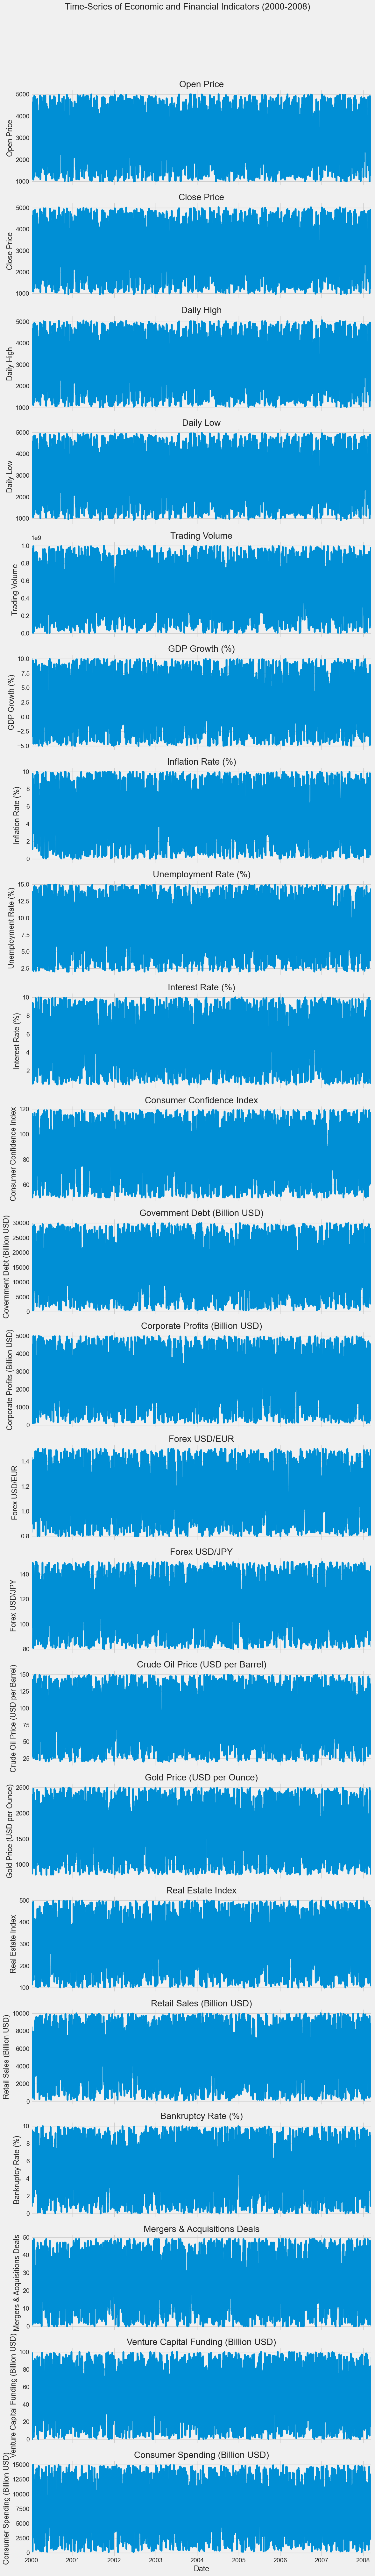

In [6]:
# visualizing key indicators
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns.tolist()
if not numeric_columns:
    print("Error: No numeric columns were found in the dataset to plot. Please check the data cleaning steps.")
else:
    # adjust the number of rows to match the count of numeric columns
    fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, len(numeric_columns) * 4), sharex=True)
    # handle the case where there is only one numeric column, as 'axes' will not be an array
    if len(numeric_columns) == 1:
        axes = [axes]
    print(f"\nPlotting the following numeric columns: {numeric_columns}")
    for i, col in enumerate(numeric_columns):
        df_cleaned[col].plot(ax=axes[i], title=col)
        axes[i].set_ylabel(col)
    plt.suptitle('Time-Series of Economic and Financial Indicators (2000-2008)', fontsize=20, y=0.92)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
# adding a check to inform the user about any columns that were skipped
non_numeric_columns = df_cleaned.select_dtypes(exclude=np.number).columns.tolist()
if non_numeric_columns:
    print(f"Warning: The following columns were skipped because they are not numeric: {non_numeric_columns}")

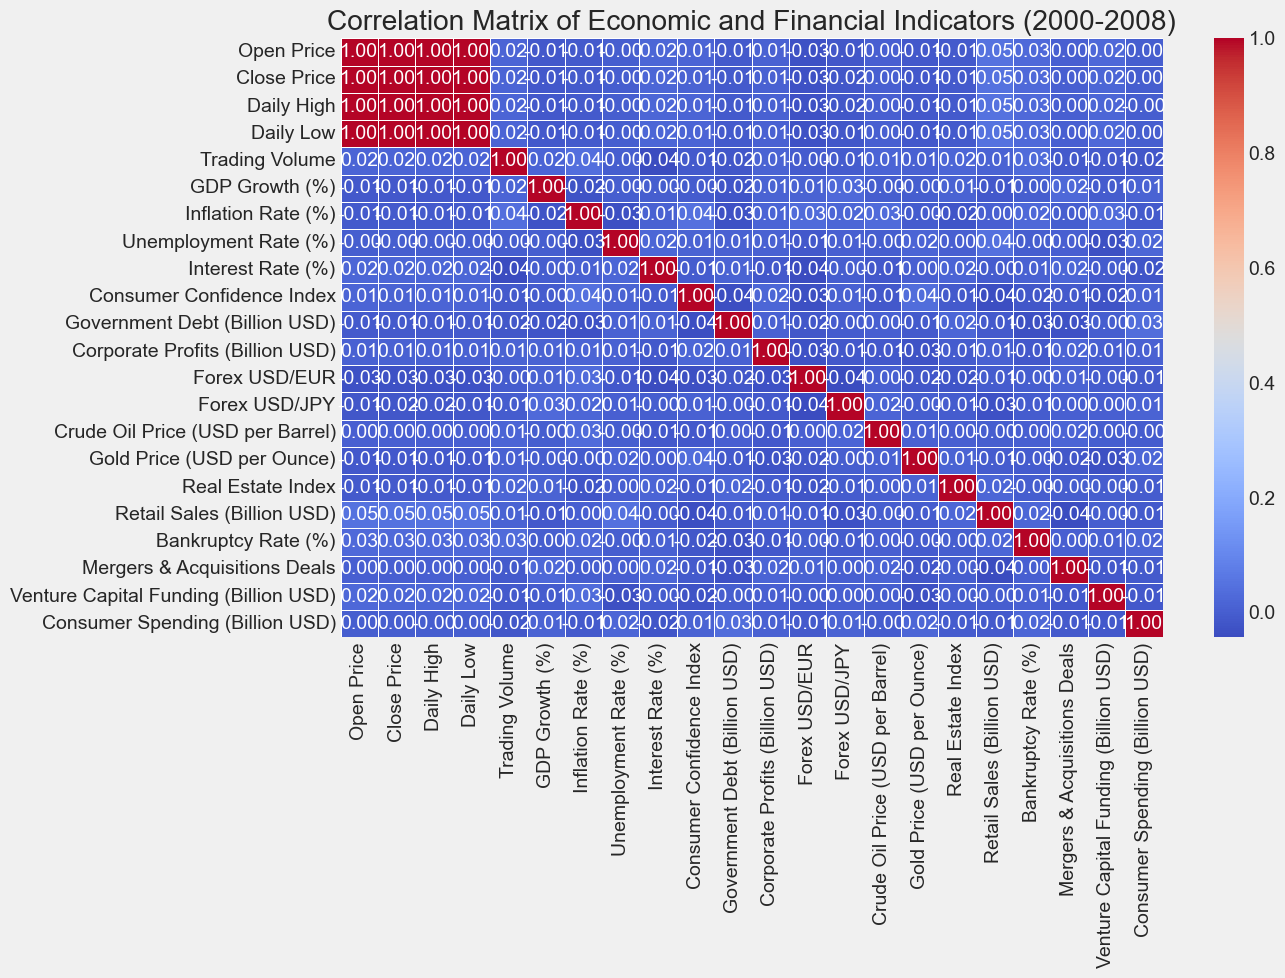

In [7]:
# correlation matrix
# computing correlation among numeric features
correlation_matrix = df_cleaned[numeric_columns].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Economic and Financial Indicators (2000-2008)")
plt.tight_layout()
plt.show()

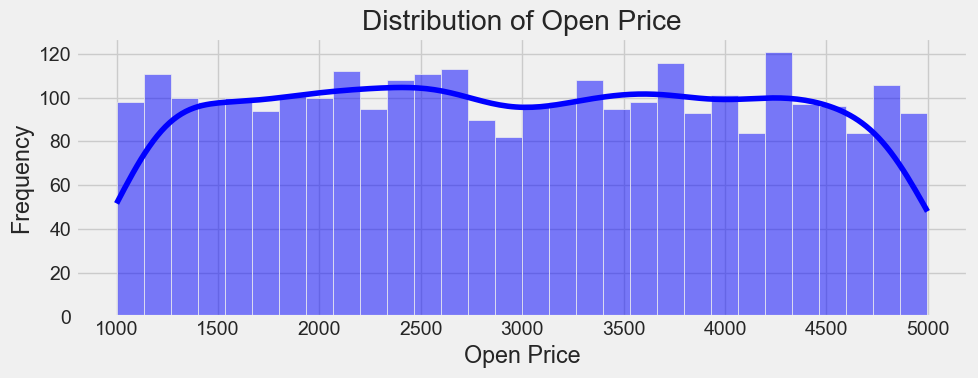

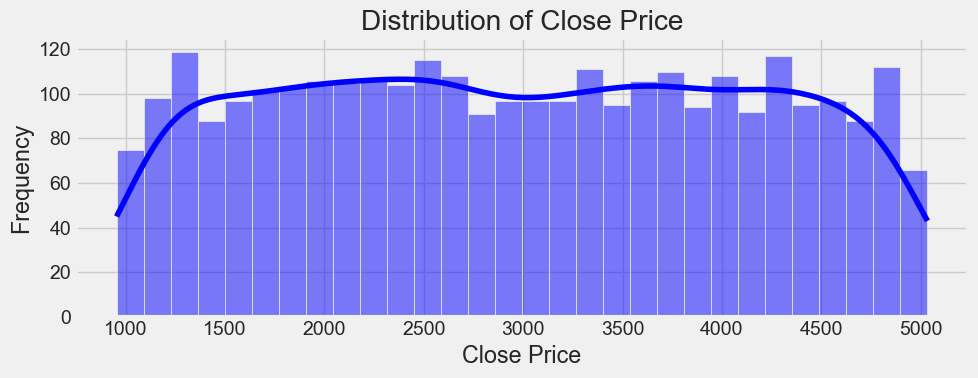

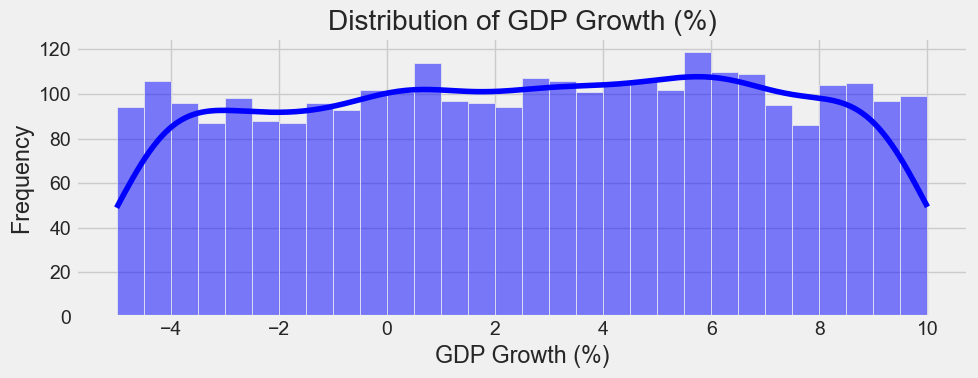

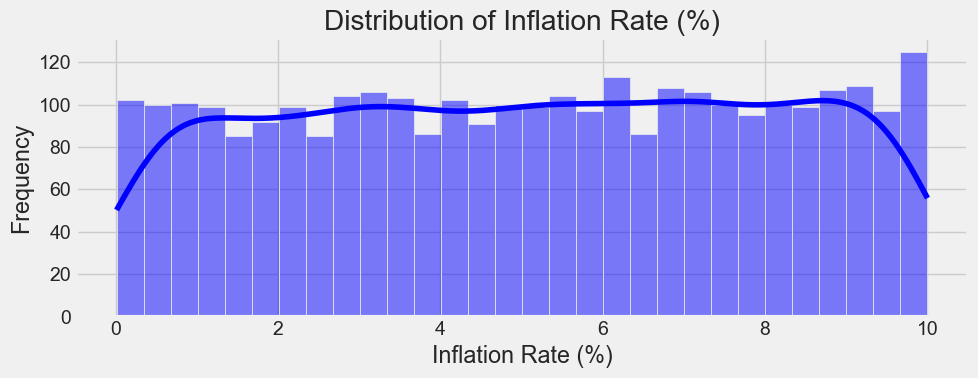

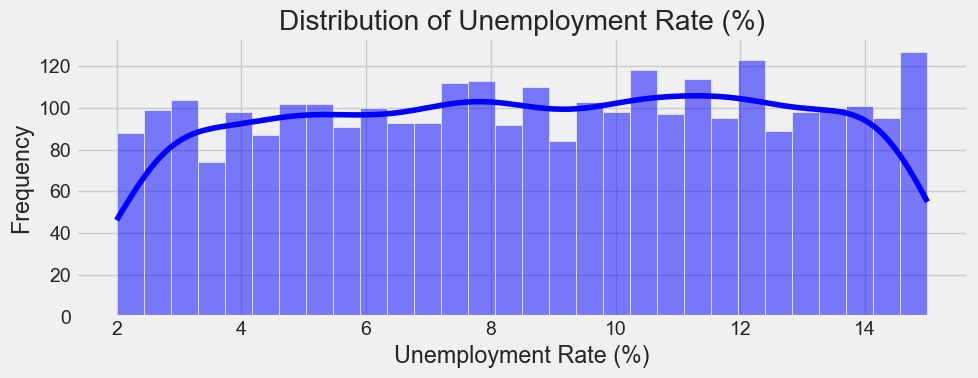

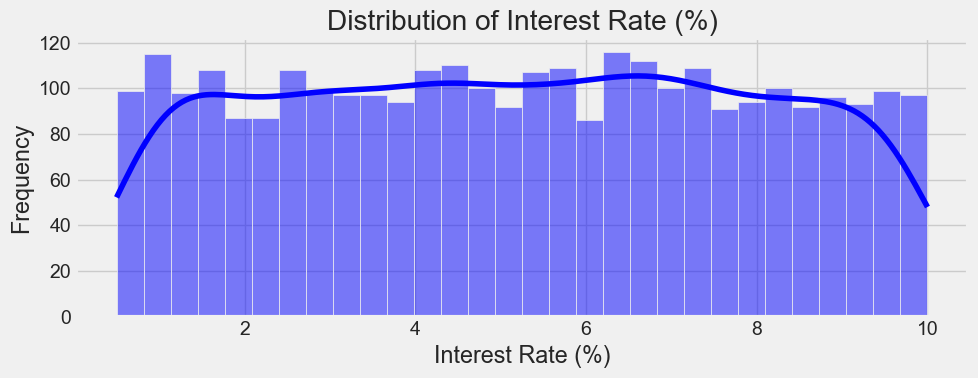

In [8]:
# distribution plots
# selecting some key variables for univariate distribution analysis
key_vars = [
    'Open Price',
    'Close Price',
    'GDP Growth (%)',
    'Inflation Rate (%)',
    'Unemployment Rate (%)',
    'Interest Rate (%)'
]
for var in key_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_cleaned[var], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

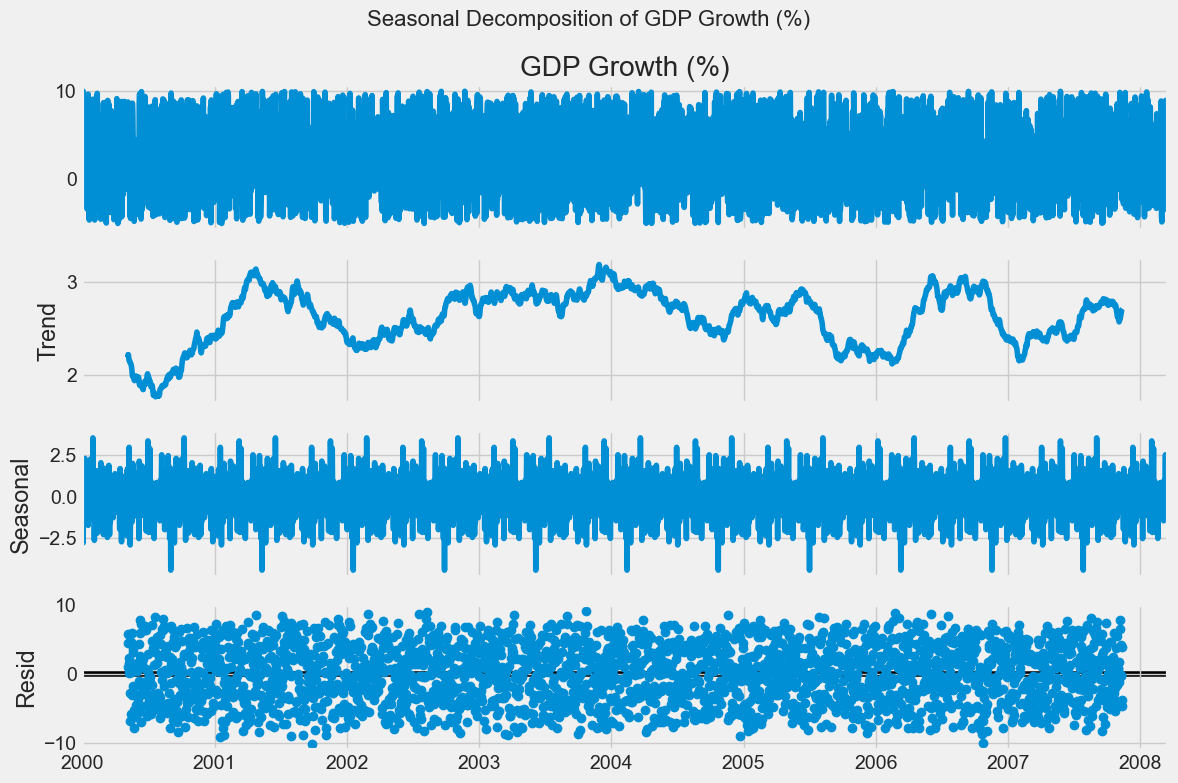

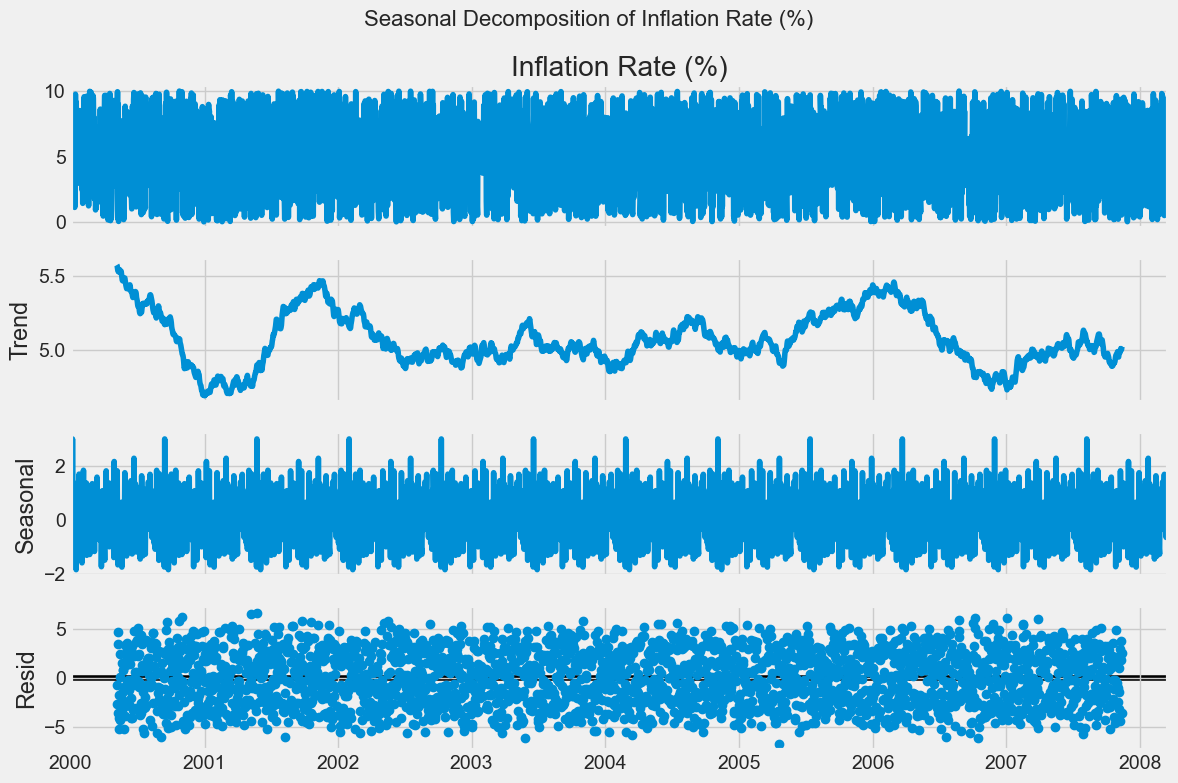

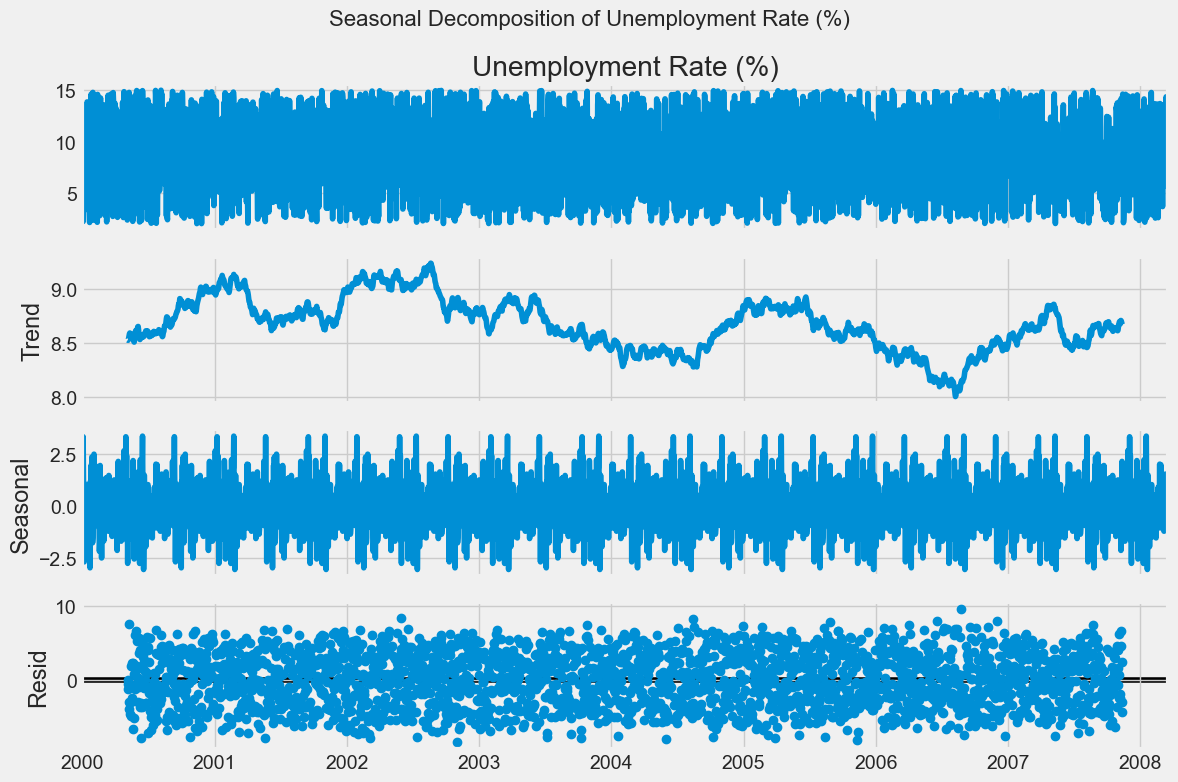

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# selecting key indicators for seasonal decomposition
decomposition_targets = ['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)']
# performing and plotting decomposition for each target
for col in decomposition_targets:
    decomposition = seasonal_decompose(df_cleaned[col], model='additive', period=252)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f'Seasonal Decomposition of {col}', fontsize=16)
    plt.tight_layout()
    plt.show()